In [1]:

import pandas as pd
import numpy as np

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data=pd.read_csv("/content/drive/MyDrive/twitter_training.csv")
test_data=pd.read_csv("/content/drive/MyDrive/twitter_validation.csv")

In [4]:
train_data.shape,test_data.shape

((74681, 4), (999, 4))

In [5]:
train_data.head()

,id,entity,label,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
train_data.shape,test_data.shape

((74681, 4), (999, 4))

In [8]:
train_data["label"].value_counts()

label
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [9]:
train_data.entity.value_counts()

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [10]:
data=train_data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74681 non-null  int64 
 1   entity  74681 non-null  object
 2   label   74681 non-null  object
 3   tweet   73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
# Sentiment Distribution Analysis
sentiment_distribution = data['label'].value_counts(normalize=True) * 100
sentiment_distribution

label
Negative      30.184384
Positive      27.893306
Neutral       24.528327
Irrelevant    17.393982
Name: proportion, dtype: float64

In [13]:
# Entity-Specific Sentiment Analysis
entity_sentiment_distribution = data.groupby('entity')['label'].value_counts(normalize=True).unstack().fillna(0) * 100
entity_sentiment_distribution

label,Irrelevant,Negative,Neutral,Positive
entity,,,,
Amazon,8.290155,24.870466,53.367876,13.471503
ApexLegends,8.080808,25.252525,39.646465,27.020202
AssassinsCreed,11.764706,16.844920,6.951872,64.438503
Battlefield,39.130435,20.204604,15.345269,25.319693
Borderlands,10.503282,18.643326,26.258206,44.595186
CS-GO,27.604167,15.104167,23.958333,33.333333
CallOfDuty,28.070175,37.343358,15.789474,18.796992
CallOfDutyBlackopsColdWar,24.242424,24.242424,15.151515,36.363636
Cyberpunk2077,20.833333,16.927083,20.312500,41.927083


In [14]:
# Volume Metrics
total_tweets = data.shape[0]
tweets_per_sentiment = data['label'].value_counts()
print("total tweets:",total_tweets)
print("tweets per sentiment:",tweets_per_sentiment)

total tweets: 74681
tweets per sentiment: label
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [15]:
# Content Analysis - Generate WordClouds for Positive and Negative tweets
positive_tweets_list =data[data['label']=='Positive']['tweet'].astype(str)
negative_ttweets_list =data[data['label']=='Negative']['tweet'].astype(str)

positive_tweets=' '.join(positive_tweets_list)
negative_tweets=' '.join(negative_ttweets_list)

In [16]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

In [17]:
sns.set(style="whitegrid")

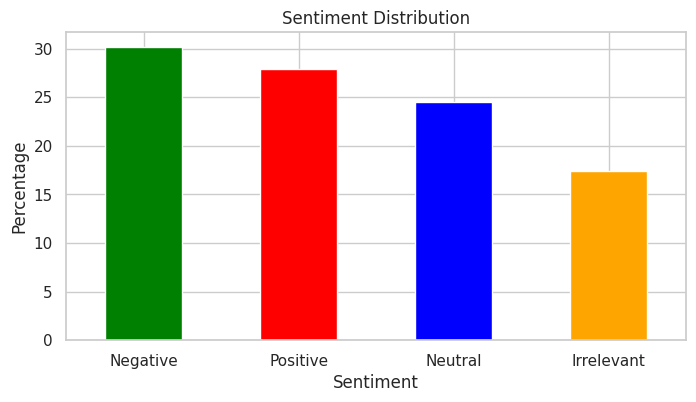

In [18]:
# Plot Sentiment Distribution
plt.figure(figsize=(8, 4))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue','orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

<Figure size 1500x2000 with 0 Axes>

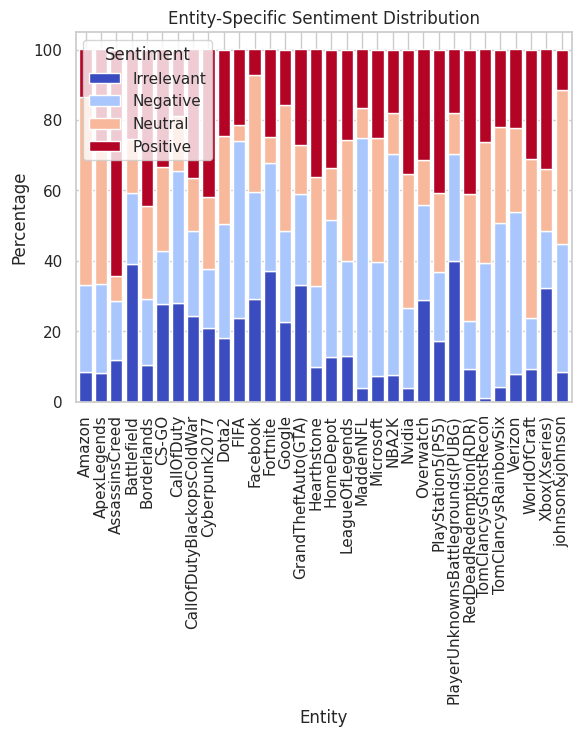

In [19]:
# Plot Entity-Specific Sentiment Distribution
plt.figure(figsize=(15, 20))
entity_sentiment_distribution.plot(kind='bar', stacked=True, colormap='coolwarm', width=0.8)
plt.title('Entity-Specific Sentiment Distribution')
plt.xlabel('Entity')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()

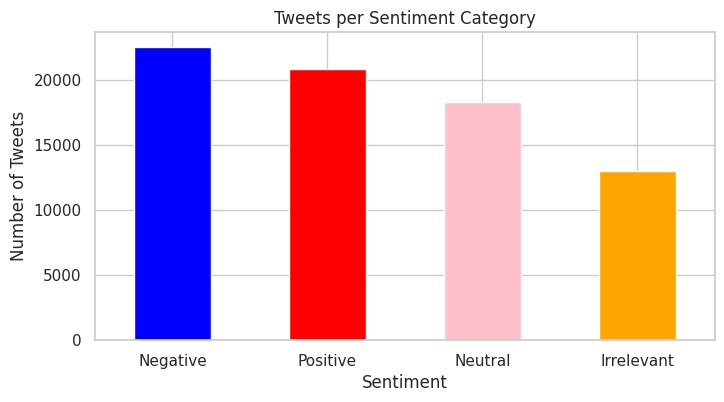

In [20]:
# Plot Volume Metrics
plt.figure(figsize=(8, 4))
tweets_per_sentiment.plot(kind='bar', color=['blue', 'red', 'pink','orange'])
plt.title('Tweets per Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

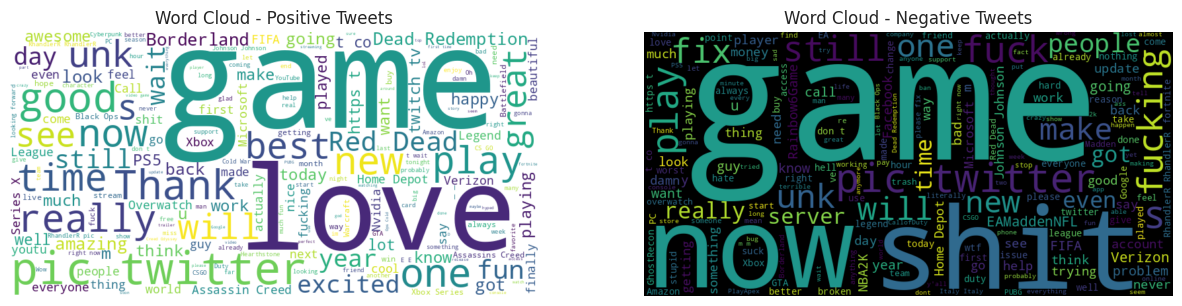

In [21]:
# Plot WordClouds
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Tweets')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Tweets')

plt.show()

Building model for sentiment classification

In [22]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [31]:
def clean_text(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)

    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    words = text.split()
    # Remove stopwords and lemmatize the text
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

In [29]:
data.head(4)

,id,entity,label,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [34]:
x_train=data['tweet']
x_test=test_data['tweet']
y_train=data['label']
y_test=test_data['label']

In [35]:
data['cleaned_tweet'] = x_train.apply(clean_text)

In [40]:
test_data['cleaned_tweet']=x_test.apply(clean_text)

In [41]:
test_data['cleaned_tweet']

0      bbc news amazon bos jeff bezos reject claim co...
1      microsoft pay word function poorly samsungus c...
2      csgo matchmaking full closet hacking truly awf...
3      president slapping american face really commit...
4      hi eahelp i’ve madeleine mccann cellar past ye...
                             ...                        
994    ⭐️ toronto art culture capital canada it’s won...
995    actually good move tot bring viewer one people...
996    today sucked it’s time drink wine n play borde...
997            bought fraction microsoft today small win
998    johnson johnson stop selling talc baby powder ...
Name: cleaned_tweet, Length: 999, dtype: object

In [42]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(data.cleaned_tweet)
X_test_tfidf = vectorizer.transform(test_data.cleaned_tweet)

In [43]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [44]:
y_pred = classifier.predict(X_test_tfidf)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [49]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8068068068068068
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.97      0.62      0.76       171
    Negative       0.69      0.94      0.80       266
     Neutral       0.95      0.71      0.81       285
    Positive       0.78      0.90      0.84       277

    accuracy                           0.81       999
   macro avg       0.85      0.79      0.80       999
weighted avg       0.84      0.81      0.81       999



predict for new data

In [50]:
def predict_new_text(texts, vectorizer=vectorizer,classifier=classifier):
    # Transform the new texts to the same vector space as the training data
    texts_tfidf = vectorizer.transform(texts)
    # Use the classifier to make predictions
    predictions = classifier.predict(texts_tfidf)
    return predictions

In [59]:
new_tweet=test_data.tweet[10:15]
new_tweet

10    Itching to assassinate \n\n#TCCGif #AssassinsC...
11    @FredTJoseph hey fred, Comcast cut the cable a...
12    CSGO WIngman (Im Silver dont bully) twitch.tv/...
13    @NBA2K game sucks... down by 2 with 38 seconds...
14    Congrats to the NVIDIA NeMo team for the 1.0.0...
Name: tweet, dtype: object

In [61]:
predictions = predict_new_text(new_tweet)

In [64]:
for text, prediction in zip(new_tweet, predictions):
    print(f'Text: "{text}" - Predicted Label: {prediction}')

Text: "Itching to assassinate 

#TCCGif #AssassinsCreedBlackFlag #AssassinsCreed #TheCapturedCollective pic.twitter.com/vv8MOGtCjw" - Predicted Label: Positive
Text: "@FredTJoseph hey fred, Comcast cut the cable and now Verizon stays calling me to shut that too pic.twitter.com/CPWSrmueDg" - Predicted Label: Negative
Text: "CSGO WIngman (Im Silver dont bully) twitch.tv/lprezh" - Predicted Label: Neutral
Text: "@NBA2K game sucks... down by 2 with 38 seconds left and my team intentionally fouls" - Predicted Label: Negative
Text: "Congrats to the NVIDIA NeMo team for the 1.0.0 release candidate!
Really excited to see NeMo embracing Hydra as the way to take control over the configuration madness that is machine learning! :)" - Predicted Label: Positive
